JSON с друзьями был получен самостоятельно, просто формировался в другом файле по инструкции отсюда: https://habr.com/ru/post/221251/. Этот файл хранится в архиве Get friends JSON по соседству.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import collections as cl
import scipy as sp
import pandas as pd

In [2]:
import json
from pandas.io.json import json_normalize
import networkx as nx

js = open('friends.json')
js = js.read()
data = json.loads(js)

In [3]:
j = 0
result = {}
r = []
covered = [1] * len(data['nodes'])
while j < len(data['links']):
    i = data['links'][j]['target']
    while (j < len(data['links'])) and (i == data['links'][j]['target']):
        r.append(data['nodes'][data['links'][j]['source']]['name'])
        j += 1
    result[data['nodes'][i]['name']] = tuple(r)
    covered[i] = 0
    r = []
for i in range(len(data['nodes'])):
    if (covered[i]): result[data['nodes'][i]['name']] = ()

In [4]:
G = nx.from_dict_of_lists(result)
n = len(G.nodes())
e = len(G.edges())
print('Nodes:', n)
print('Edges:', e)

Nodes: 357
Edges: 3740


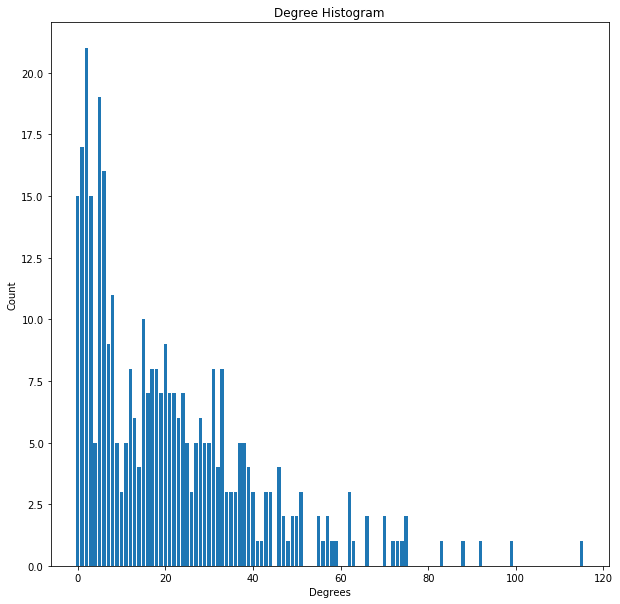

In [5]:
degrees = [val for (node, val) in G.degree(nbunch=None, weight=None)]
degreeCount = cl.Counter(degrees)
deg, cnt = zip(*degreeCount.items())

plt.figure(figsize=(10,10))
plt.title("Degree Histogram")
plt.bar(deg, cnt)
plt.xlabel("Degrees")
plt.ylabel("Count")
plt.show()

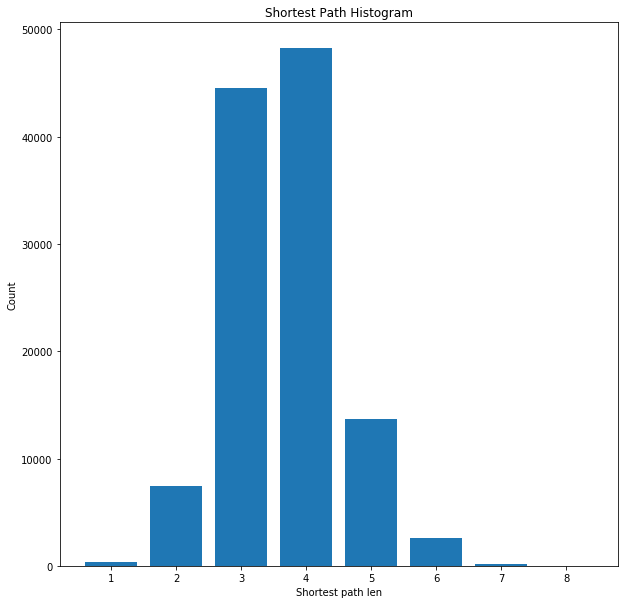

In [6]:
paths = [len(path) for (a, b) in nx.all_pairs_shortest_path(G) for path in b.values()]
pathCount = cl.Counter(paths)
deg, cnt = zip(*pathCount.items())

plt.figure(figsize=(10,10))
plt.title("Shortest Path Histogram")
plt.bar(deg, cnt)
plt.xlabel("Shortest path len")
plt.ylabel("Count")
plt.show()

In [7]:
for i in nx.connected_component_subgraphs(G):
    d = nx.diameter(i) 
    if (d > 0): print('Diameter:', d)

Diameter: 7


In [8]:
for i in nx.connected_component_subgraphs(G):
    r = nx.radius(i) 
    if (r > 0): print('Radius:', r)

Radius: 4


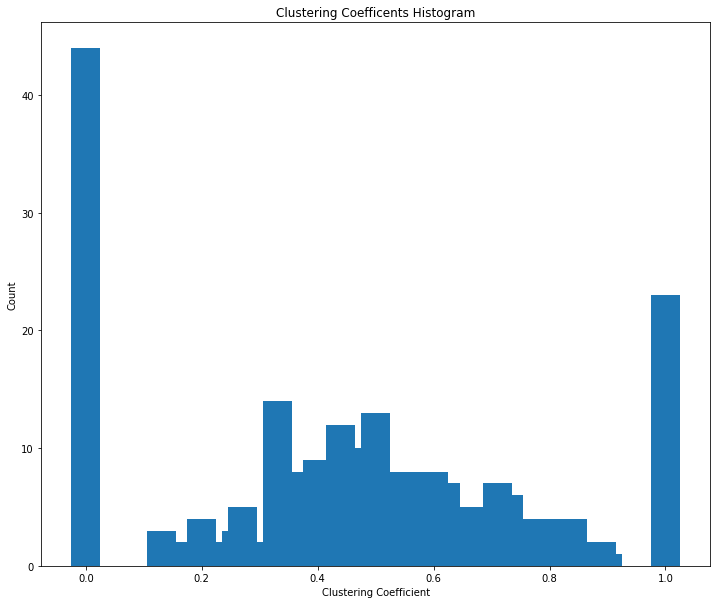

In [9]:
q = cl.Counter([round(i,2) for i in nx.clustering(G).values()])
deg, cnt = zip(*q.items())

plt.figure(figsize=(12,10))
plt.title("Clustering Coefficents Histogram")
plt.bar(deg, cnt, width=0.05)
plt.xlabel("Clustering Coefficient")
plt.ylabel("Count")
plt.show()

In [10]:
gcc = nx.average_clustering(G)
print('Global Clustering coefficient:', gcc)

Global Clustering coefficient: 0.4668588281155645


Degree Centers:
1 ) Антон Байнов
2 ) Вова Пермяков
3 ) Артём Орлов
4 ) Максим Мирошников
5 ) Александр Ильин


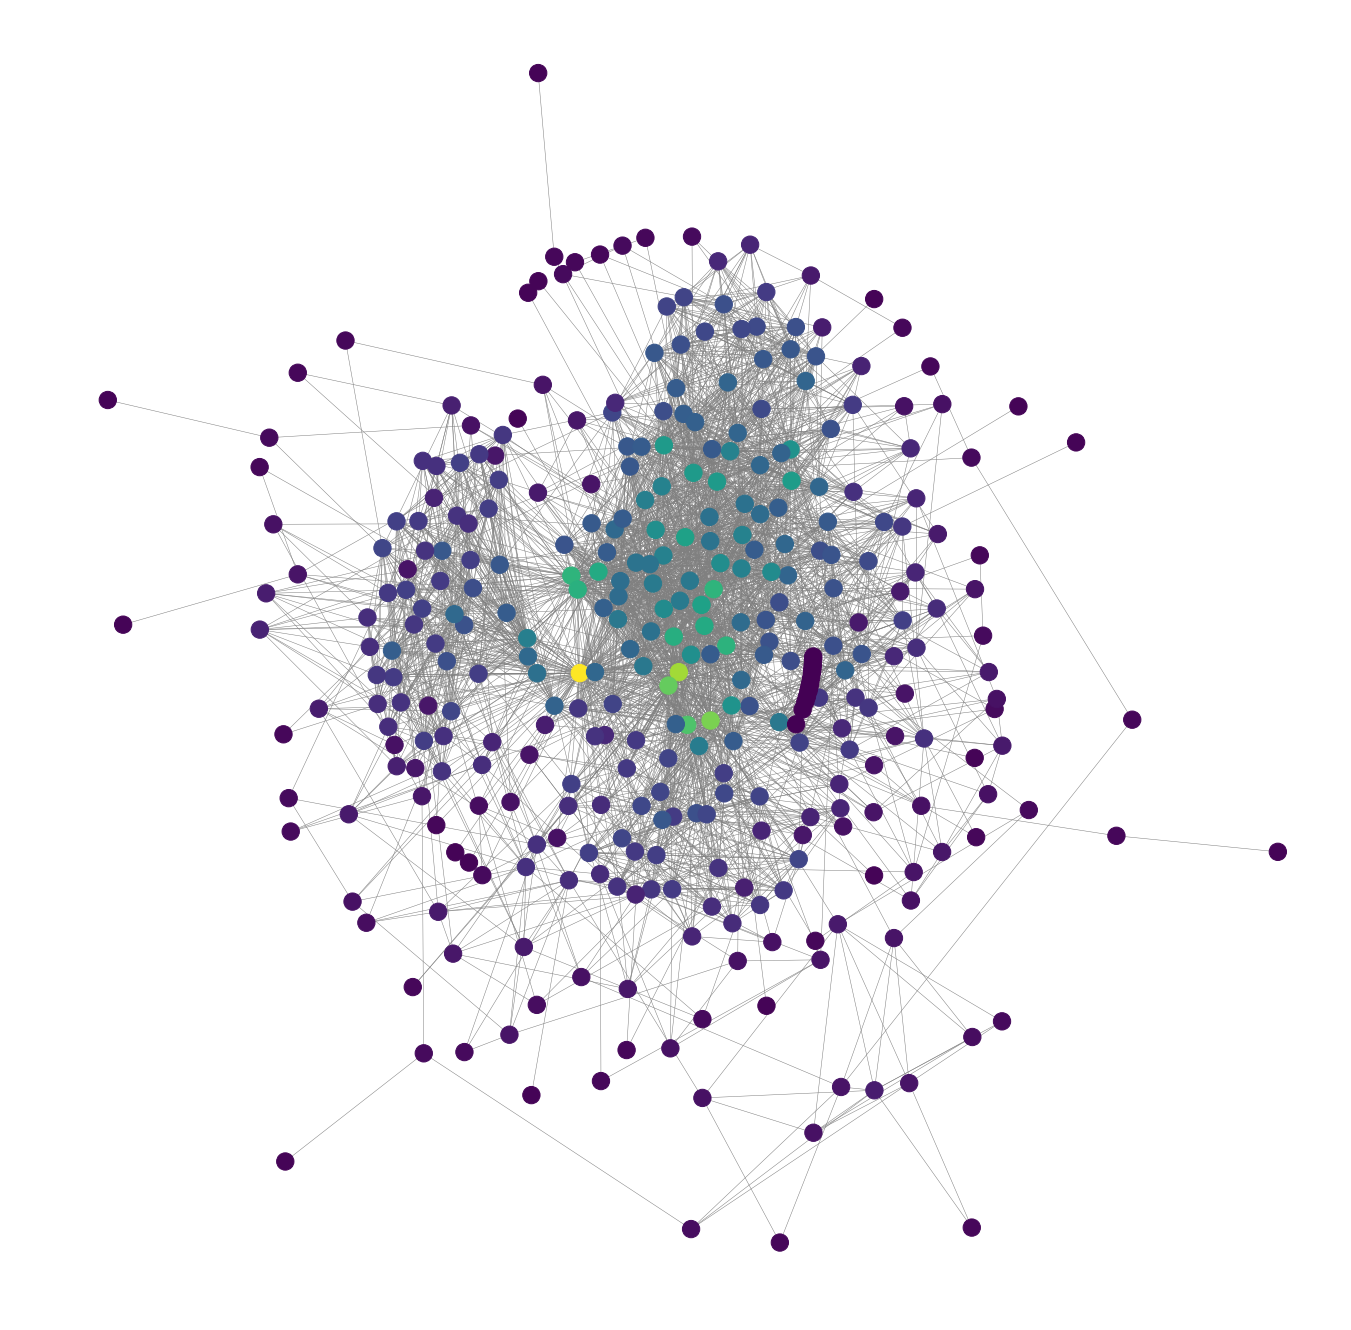

In [11]:
degree = nx.degree_centrality(G)

print('Degree Centers:')
o = [(i, degree[i]) for i in sorted(degree, key=degree.get, reverse=True)]
for i in range(5):
     print(i + 1, ')', o[i][0])

nx.set_node_attributes(G, degree, "degree")

deg = np.array(list(nx.get_node_attributes(G, "degree").values())).astype(dtype=float)

plt.figure(figsize=(18,18))
nx.draw_kamada_kawai(G, node_color=deg, width=0.5, edge_color='gray', font_size=11)

Closeness Centers:
1 ) Антон Байнов
2 ) Вова Пермяков
3 ) Артём Орлов
4 ) Максим Мирошников
5 ) Анюта Ёжикова


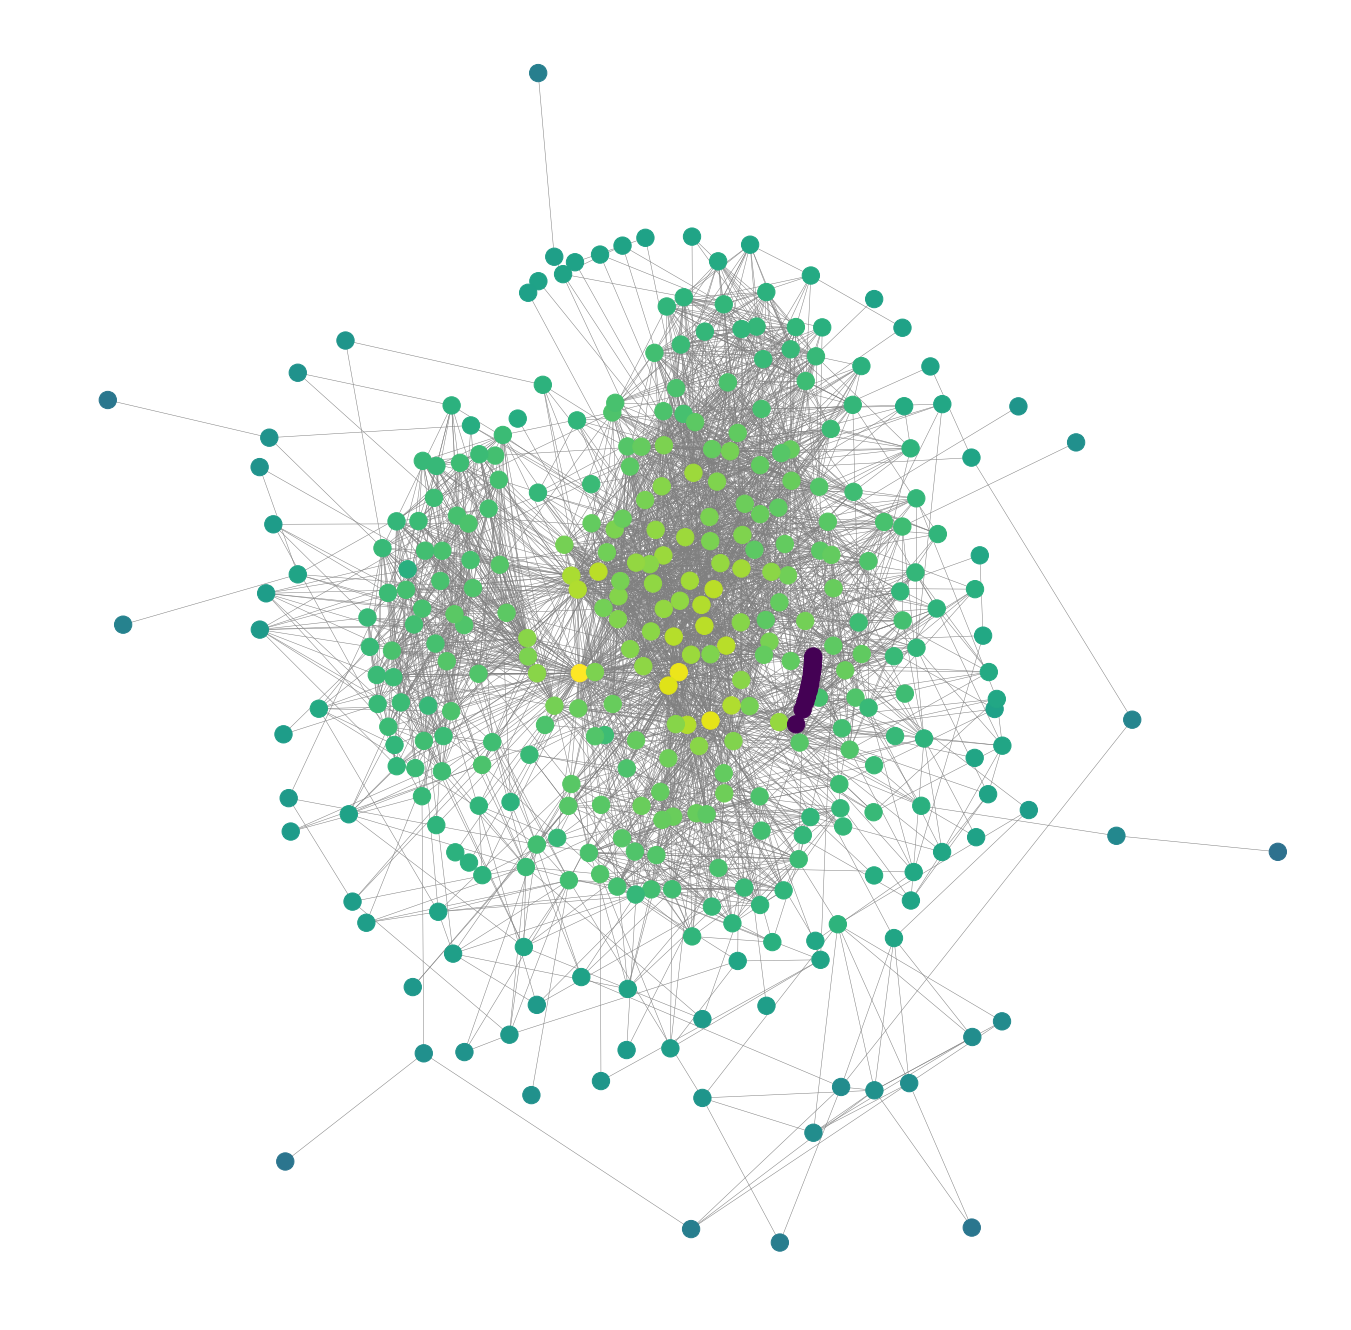

In [12]:
closeness = nx.closeness_centrality(G)

print('Closeness Centers:')
o = [(i, closeness[i]) for i in sorted(closeness, key=closeness.get, reverse=True)]
for i in range(5):
    print(i + 1, ')', o[i][0])

nx.set_node_attributes(G, closeness, "closeness")

clo = np.array(list(nx.get_node_attributes(G, "closeness").values())).astype(dtype=float)

plt.figure(figsize=(18,18))
nx.draw_kamada_kawai(G, node_color=clo, width=0.5, edge_color='gray', font_size=11)

Betweenness Centers:
1 ) Антон Байнов
2 ) Артём Орлов
3 ) Женьчик Шабанова
4 ) Вова Пермяков
5 ) Максим Мирошников


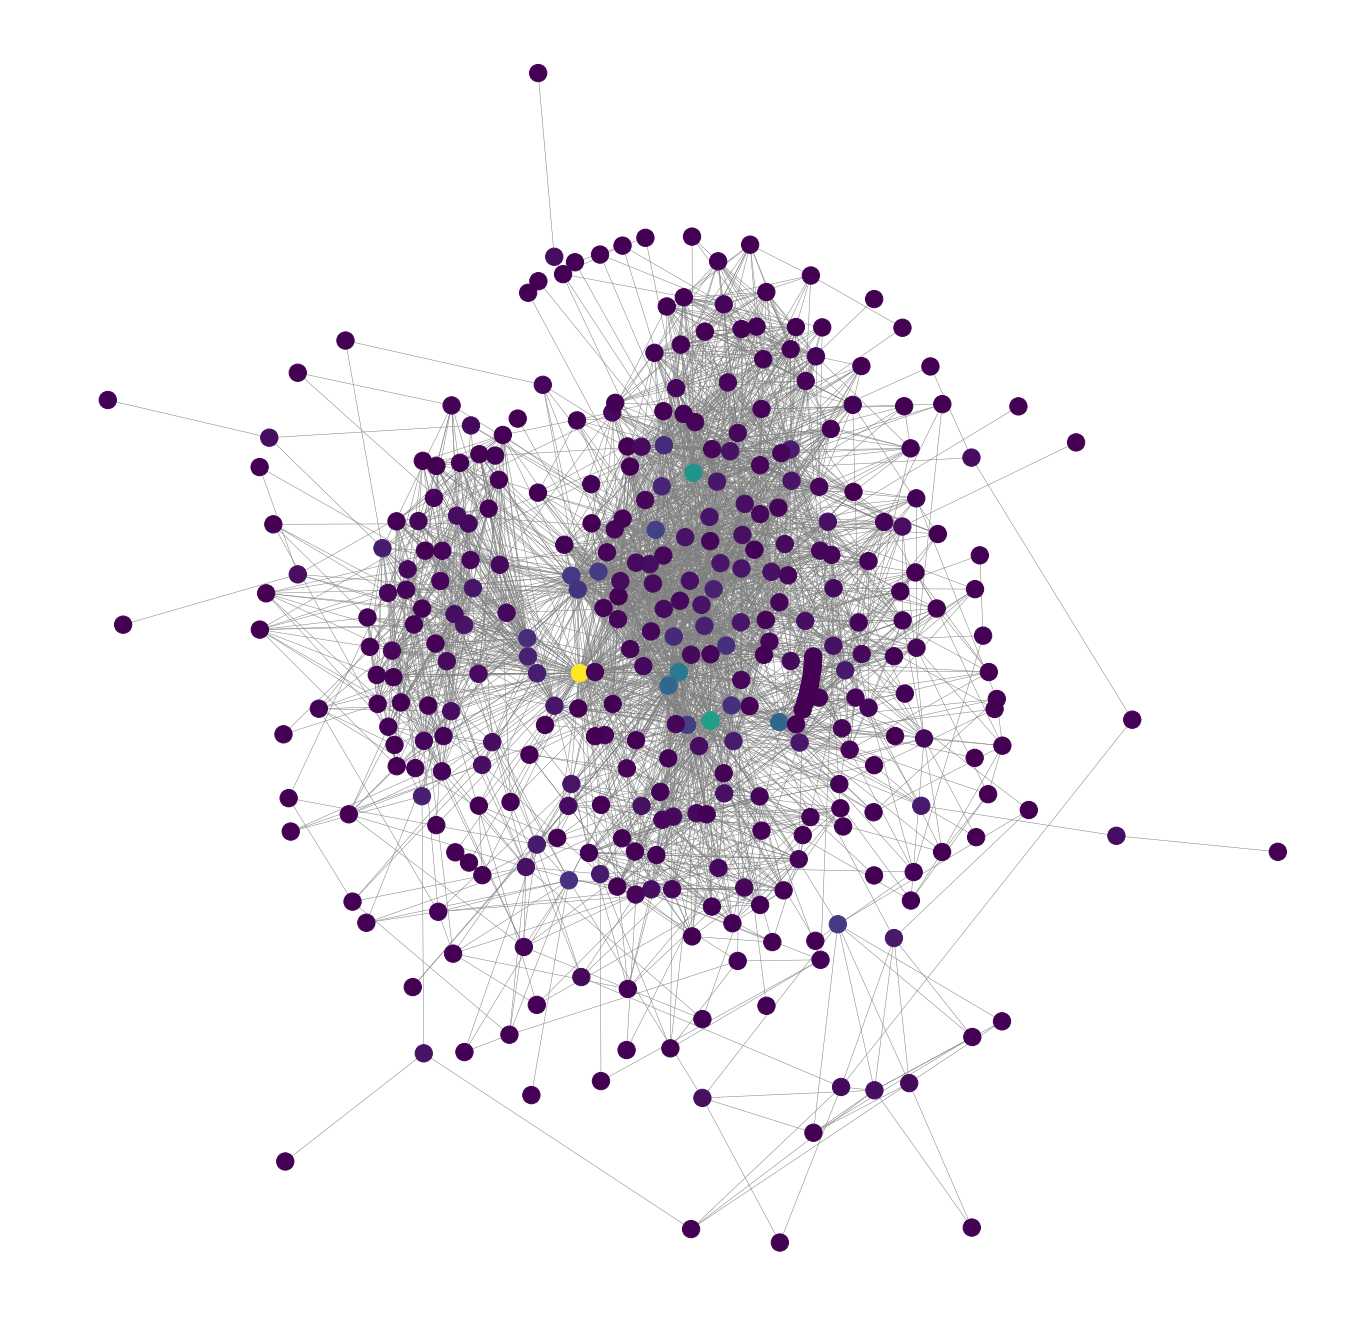

In [13]:
betweenness = nx.betweenness_centrality(G)

print('Betweenness Centers:')
o = [(i, betweenness[i]) for i in sorted(betweenness, key=betweenness.get, reverse=True)]
for i in range(5):
    print(i + 1, ')', o[i][0])

nx.set_node_attributes(G, betweenness, "betweenness")

bet = np.array(list(nx.get_node_attributes(G, "betweenness").values())).astype(dtype=float)

plt.figure(figsize=(18,18))
nx.draw_kamada_kawai(G, node_color=bet, width=0.5, edge_color='gray', font_size=11)

Page Rank:
1 ) Антон Байнов
2 ) Артём Орлов
3 ) Вова Пермяков
4 ) Максим Мирошников
5 ) Александр Ильин


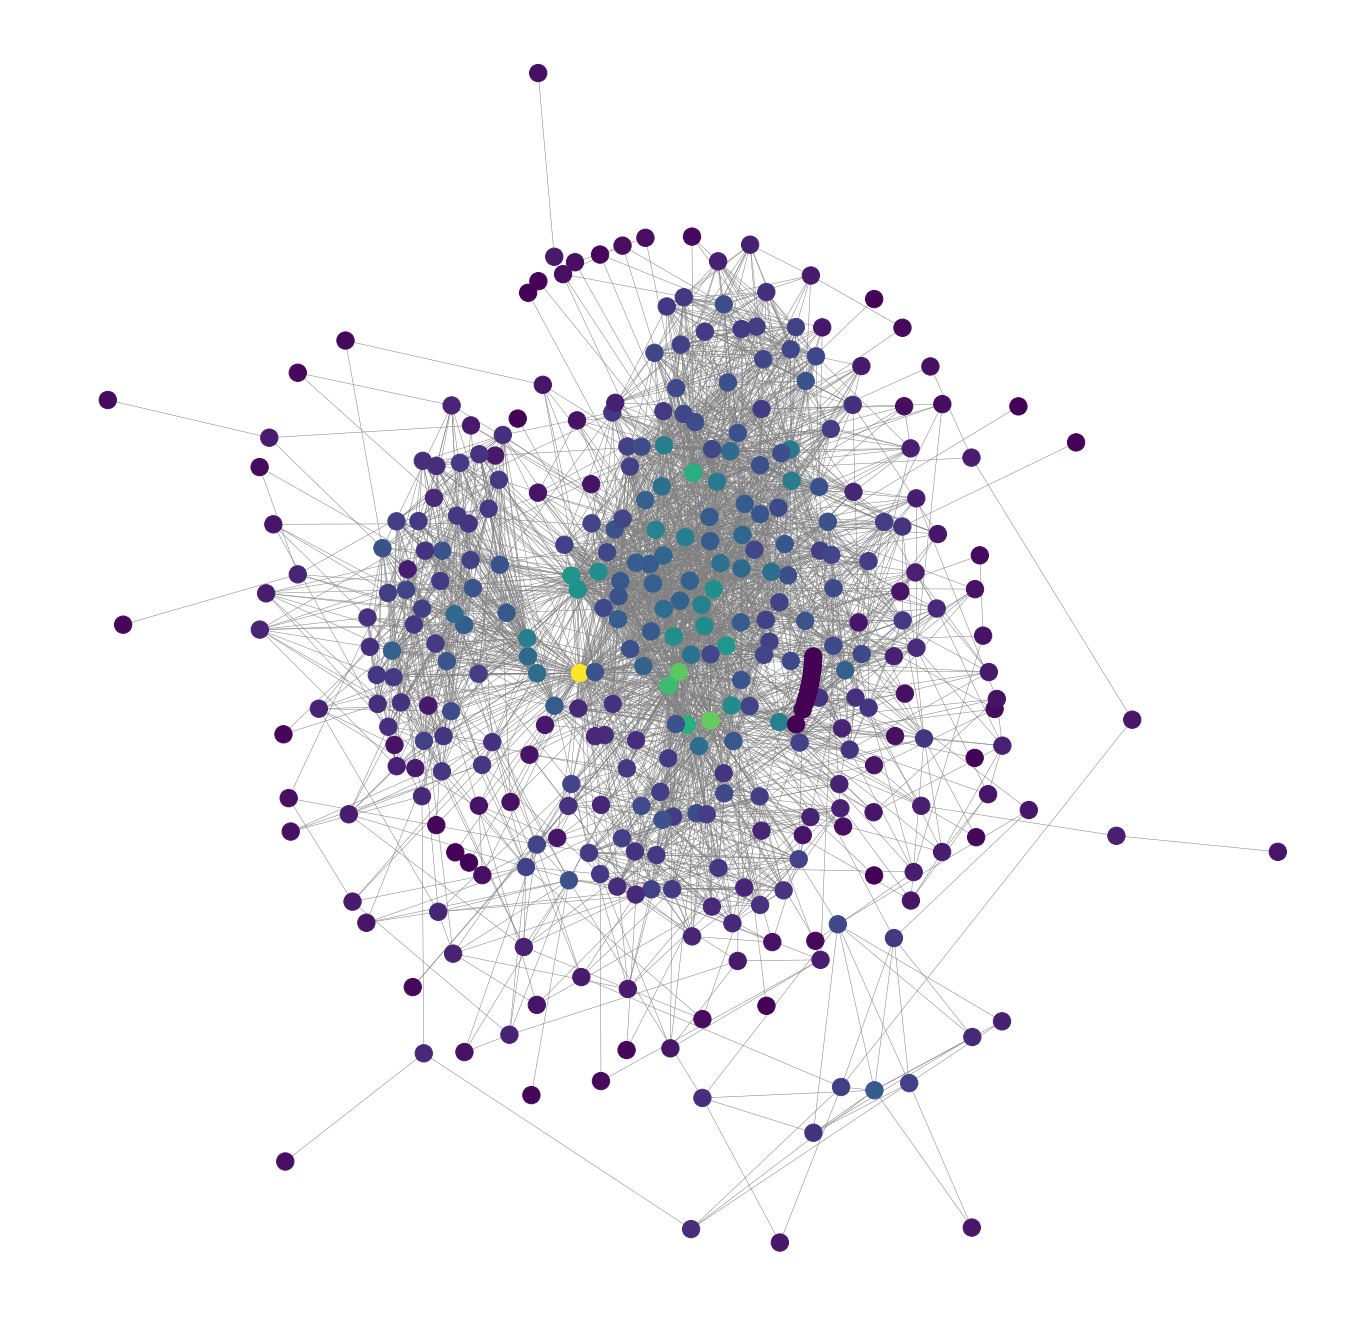

In [14]:
pr = nx.pagerank(G)

print('Page Rank:')
o = [(i, pr[i]) for i in sorted(pr, key=pr.get, reverse=True)]
for i in range(5):
    print(i + 1, ')', o[i][0])

nx.set_node_attributes(G, pr, "pr")

prr = np.array(list(nx.get_node_attributes(G, "pr").values())).astype(dtype=float)

plt.figure(figsize=(18,18))
nx.draw_kamada_kawai(G, node_color=prr, width=0.5, edge_color='gray', font_size=11)

In [15]:
print(nx.attribute_assortativity_coefficient(G, 'name'))

nan


/anaconda3/lib/python3.6/site-packages/networkx/algorithms/assortativity/correlation.py:265: RuntimeWarning: invalid value encountered in true_divide
  r = (t - s) / (1 - s)


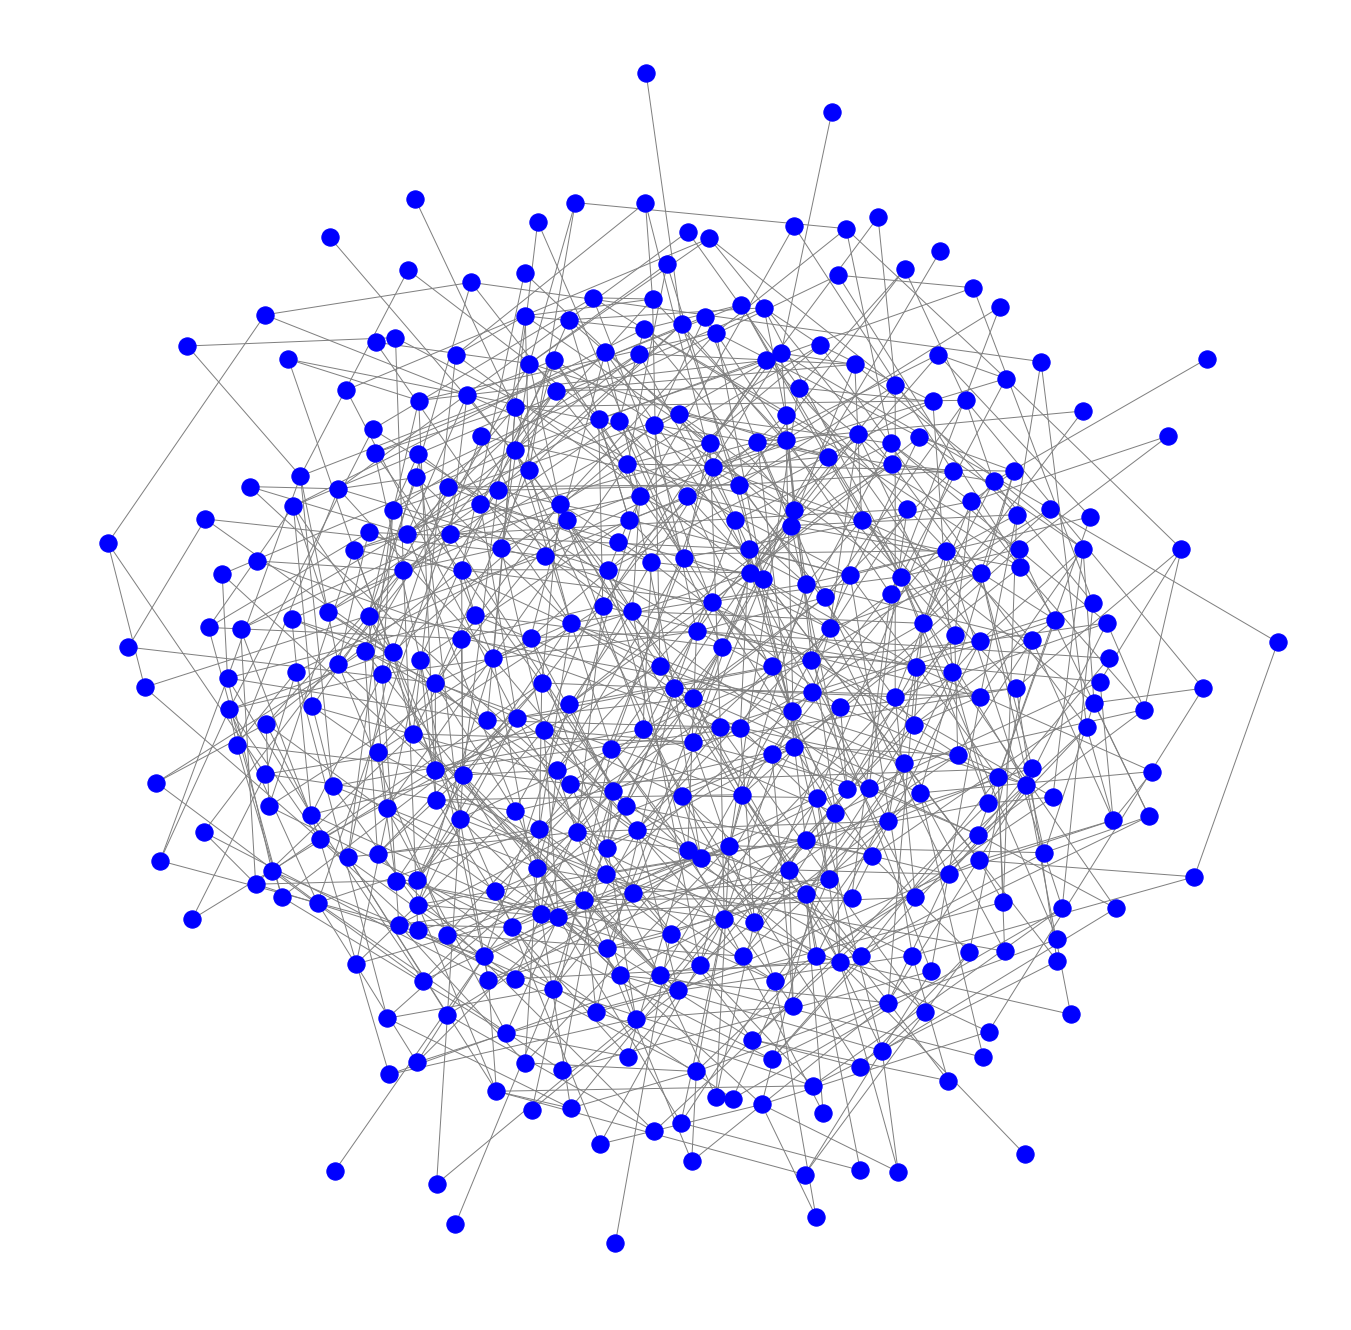

In [44]:
prob = e / (n * (n - 1)) / 2
GG = nx.gnp_random_graph(n, prob)
    
pos=nx.kamada_kawai_layout(GG)

plt.figure(figsize=(18,18))
nx.draw_kamada_kawai(GG, node_color = 'blue', edge_color = 'gray')
plt.show()

In [55]:
clique = nx.find_cliques(G)
clique = sorted(clique, key=lambda x : len(x), reverse=True)

print(clique)

[['Николай Чуйкин', 'Ксюша Медведева', 'Katya Gushina', 'Андреас Димитриу', 'Аня Малькова', 'Саша Вайт', 'Сережа Гудков', 'Аня Мамонтова', 'Саня Туранов', 'Дмитрий Туранов', 'Наталья Разина', 'Женьчик Шабанова', 'Серега Морев', 'Настя Запорожец', 'Николай Зенкин', 'Нина Смирнова'], ['Николай Чуйкин', 'Оксана Смирнова', 'Дмитрий Туранов', 'Саня Туранов', 'Николай Зенкин', 'Андреас Димитриу', 'Katya Gushina', 'Сережа Гудков', 'Аня Мамонтова', 'Аня Малькова', 'Саша Вайт', 'Наталья Разина', 'Серега Морев', 'Настя Запорожец', 'Женьчик Шабанова', 'Нина Смирнова'], ['Николай Чуйкин', 'Ксюша Медведева', 'Katya Gushina', 'Андреас Димитриу', 'Аня Малькова', 'Саша Вайт', 'Сережа Гудков', 'Аня Мамонтова', 'Саня Туранов', 'Дмитрий Туранов', 'Наталья Разина', 'Женьчик Шабанова', 'Серега Морев', 'Настя Запорожец', 'Артем Анисимов'], ['Николай Чуйкин', 'Елисей Граделев', 'Андреас Димитриу', 'Katya Gushina', 'Женьчик Шабанова', 'Серега Морев', 'Дмитрий Туранов', 'Саня Туранов', 'Аня Мамонтова', 'Аня Ма

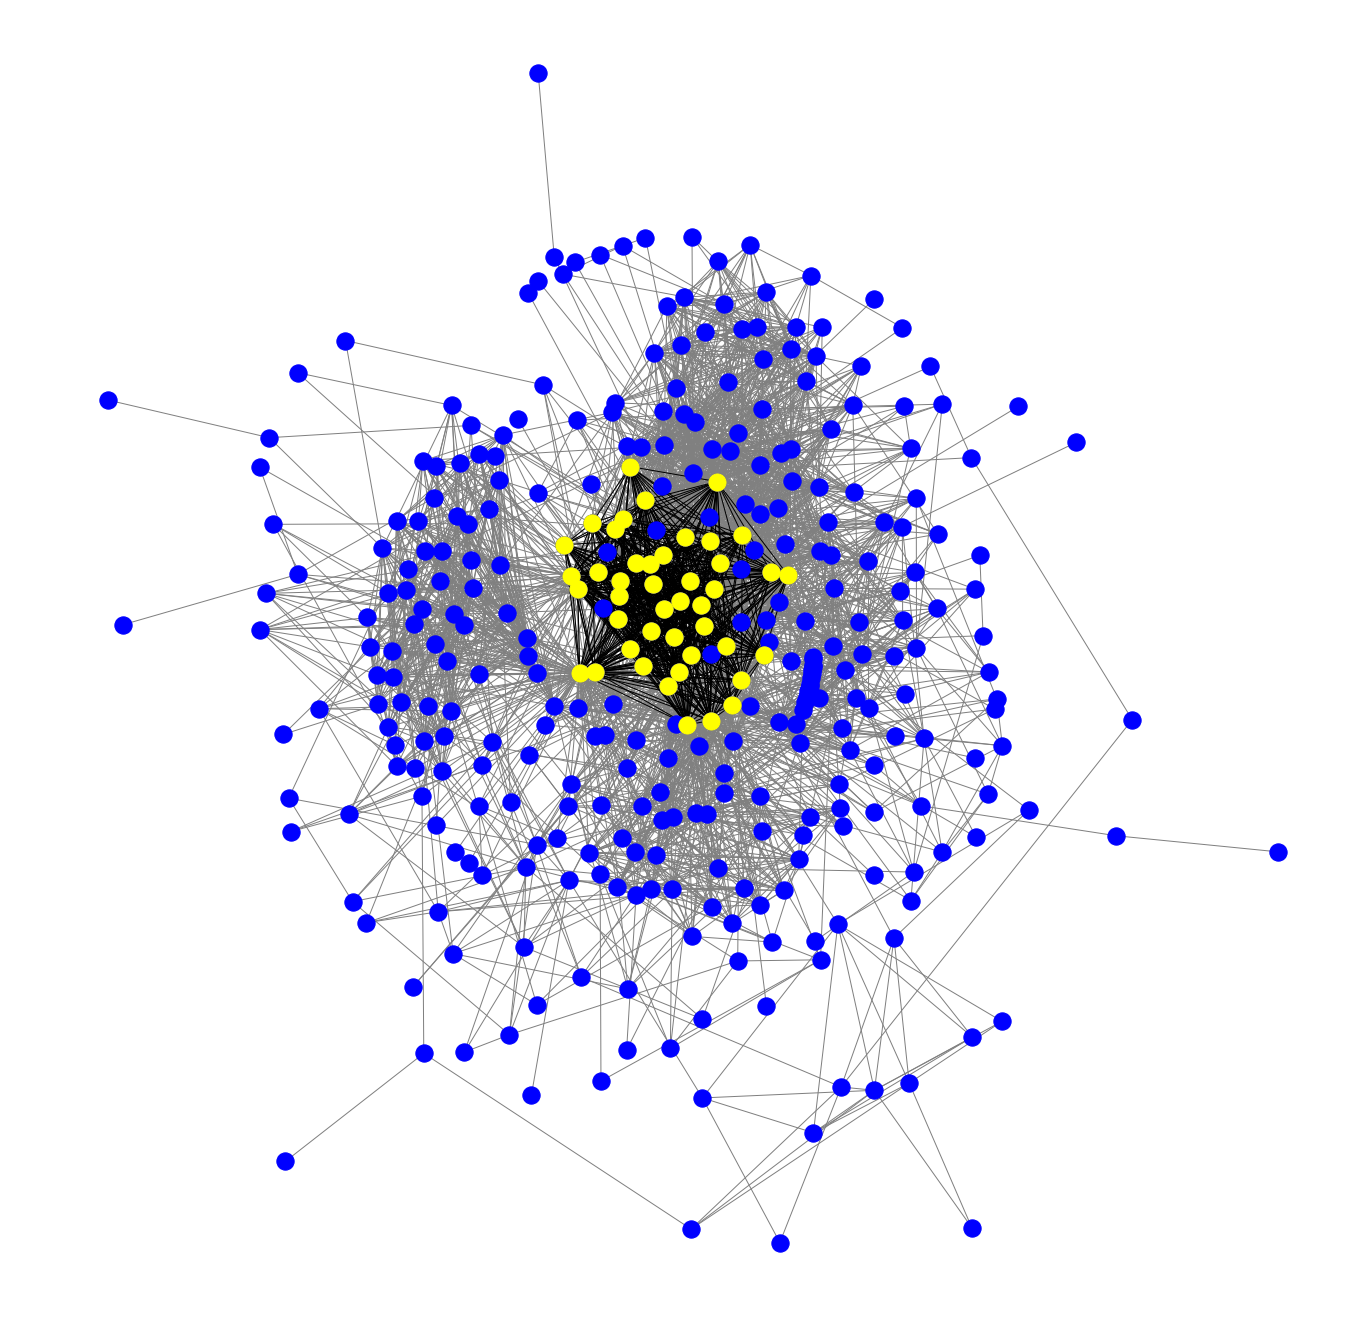

In [66]:
kc = nx.k_core(G)

pos = nx.kamada_kawai_layout(G)
plt.figure(figsize=(18,18))
nx.draw(G, pos, edge_color="gray", node_color="blue")
nx.draw(kc, pos, nodelist=kc.nodes(), node_color="yellow")
plt.show()

In [67]:
from networkx.algorithms import community
communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))

[['Alexander Kozhushko',
  'Alexander Sokolin',
  'Aliya Dzhaber',
  'Angelina Kovalenko',
  'Dmitry Mironov',
  'Dmitry Skvortsov',
  'Egor Vasilyev',
  'Elin Rin',
  'Irinka Rink',
  'Julian Zakharyan',
  'Katya Gushina',
  'Lady Ari',
  'Levon Sargsyan',
  'Maria Skryabina',
  'Max Vart',
  'Michael Filippov',
  'Nikita Chirikov',
  'Polina Chervakova',
  'Rafael Guliev',
  'Sanjar Khankel',
  'Sasha Illarionov',
  'Susanna Newman',
  'Адам Кажаров',
  'Аж Де',
  'Азат Ахметов',
  'Аким Цвигун',
  'Алекзандер Ильин',
  'Александр Волынец',
  'Александр Газарян',
  'Александр Гинзбург',
  'Александр Глушков',
  'Александр Головачев',
  'Александр Горбачев',
  'Александр Дмитриев',
  'Александр Ежов',
  'Александр Ильин',
  'Александр Коченов',
  'Александр Паволоцкий',
  'Александр Панаетов',
  'Александр Петров',
  'Александр Савинов',
  'Александр Трунов',
  'Александр Туранов',
  'Александра Заботкина',
  'Александра Лебедева',
  'Александра Портянникова',
  'Алексей Биршерт',
  '

In [71]:
communities_generator = community.kernighan_lin_bisection(G)
communities_generator

({'Alexander Kozhushko',
  'Alexander Sokolin',
  'Aliya Dzhaber',
  'Dmitry Mironov',
  'Dmitry Skvortsov',
  'Egor Vasilyev',
  'Irinka Rink',
  'Julian Zakharyan',
  'Katya Gushina',
  'Lady Ari',
  'Maria Skryabina',
  'Michael Filippov',
  'Nikita Chirikov',
  'Polina Chervakova',
  'Susanna Newman',
  'Адам Кажаров',
  'Аким Цвигун',
  'Алекзандер Ильин',
  'Александр Волынец',
  'Александр Гинзбург',
  'Александр Головачев',
  'Александр Дмитриев',
  'Александр Ильин',
  'Александр Коченов',
  'Александр Паволоцкий',
  'Александр Савинов',
  'Александр Трунов',
  'Александр Туранов',
  'Александра Лебедева',
  'Александра Портянникова',
  'Алексей Кичигин',
  'Алексей Лазарев',
  'Алина Юсупова',
  'Анастасия Сахарова',
  'Анастасия Фаризова',
  'Анастасия Цыганова',
  'Андреас Димитриу',
  'Андрей Бабков',
  'Андрей Масалов',
  'Андрей Саблин',
  'Андрей Хвощ',
  'Андрей Черемнов',
  'Анечка Медведева',
  'Антон Байнов',
  'Антон Емельченков',
  'Антон Прощенко',
  'Анюта Ёжико

In [76]:
from networkx.algorithms.community import k_clique_communities
c = list(k_clique_communities(G, 4))
print(list(c[0]))

['Денис Трофимов', 'Катерина Писарева', 'Max Vart', 'Nikita Chirikov', 'Федор Давыдов', 'Инна Михайлищева', 'Иван Убеев', 'Egor Vasilyev']


In [77]:
print(list(k_clique_communities(G, 10)))

[frozenset({'Денис Ракитин', 'Алексей Лёвушкин', 'Михаил Семенов', 'Егор Зайцев', 'Юлия Трофимова', 'Фед Павлов', 'Александр Ежов', 'Александр Панаетов', 'Глеб Чистяков', 'Олег Дешеулин', 'Алёна Ким', 'Игорь Минеев', 'Вадим Клочков', 'Ирина Понамарева', 'Александр Газарян', 'Николай Вельдяйкин', 'Люба Гунченко', 'Мария Конькова', 'Даниил Гонтарь', 'Паша Потёмкин', 'Иван Чистяков', 'Тимур Петров', 'Никита Михайлов', 'Максим Кобелев', 'Ярик Иванашев', 'Тимофей Гутор', 'Анастасия Родигина', 'Максим Кузнецов', 'Артем Егерев', 'Антон Байнов', 'Ахмад Сумекенов', 'Григорий Суханов', 'Лиза Токарева'}), frozenset({'Александр Савинов', 'Александр Дмитриев', 'Артём Орлов', 'Егор Зайцев', 'Андрей Черемнов', 'Макс Мальцев', 'Катя Чистякова', 'Ксения Щиковская', 'Влад Глазьев', 'Кирилл Мащенко', 'Вова Пермяков', 'Maria Skryabina', 'Александр Паволоцкий', 'Ксения Рылова', 'Мари Запорожец', 'Дмитрий Шилинговский', 'Андрей Саблин', 'Антон Емельченков', 'Алекзандер Ильин', 'Марина Королева', 'Аня Сапожн